In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
file = "..\..\data\TSP_instance_n_10_s_1.dat"
f = open(file, 'r')
n = int(f.readline())
points = [[], []]

for line in f:
    coords = line.split()
    points[0].append(float(coords[0]))
    points[1].append(float(coords[1]))

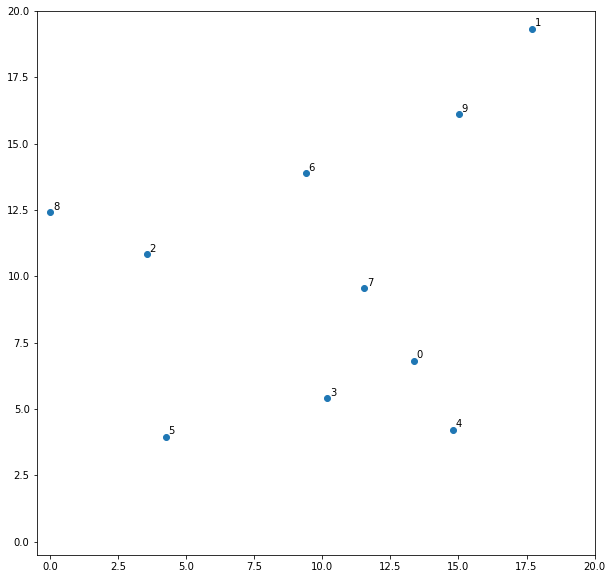

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
#ax.set_aspect('equal')
#plt.gca().set_aspect('equal')
plt.xlim([-0.5, 20])
plt.ylim([-0.5, 20])
plt.plot(points[0], points[1], "o")
for i in range(len(points[0])):
    plt.annotate(i, (points[0][i] + 0.1, points[1][i] + 0.1))